In [70]:
try:
    import pandas as pd
    import joblib
    import matplotlib.pyplot as plt
    %matplotlib inline
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import numpy as np
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    from keras.callbacks import EarlyStopping
    from xgboost import XGBClassifier
    from scipy import stats
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.datasets import make_regression, make_swiss_roll
    from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LinearRegression, LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    from sklearn.svm import SVC, SVR
    from sklearn.tree import DecisionTreeClassifier

    print('All libraries imported successfully!')
except ImportError:
    print('Some libraries failed to import.')

All libraries imported successfully!


In [71]:
# Load the dataset
data = pd.read_csv('/Users/beau/Desktop/house_of_hope/clean_df.csv')
data

,EDUC,MARSTAT,SERVICES,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,PSYPROB,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,3,1,7,7,6,1,0,2,2,1,...,0,0,0,0,0,0,9,4,0,1
1,3,4,7,8,1,1,0,2,2,1,...,0,0,0,0,0,1,9,4,0,3
2,3,4,7,7,3,1,0,1,2,2,...,0,0,0,0,0,0,9,4,0,2
3,5,1,7,4,7,0,0,1,2,2,...,0,0,0,0,0,0,9,4,0,1
4,3,4,7,3,7,1,1,4,2,1,...,0,0,0,0,0,0,9,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6441464,4,2,7,7,1,0,1,1,2,2,...,0,0,0,0,0,0,8,4,0,1
6441465,1,1,7,5,7,0,0,4,2,2,...,0,0,0,0,0,0,8,4,0,2
6441466,1,1,7,4,7,0,0,4,2,2,...,0,0,0,0,0,1,8,4,0,3
6441467,4,4,7,6,7,0,0,4,2,2,...,0,0,0,0,0,0,8,4,0,1


In [72]:
# # what columns have -9 values?
# data.columns[data.isin([-9]).any()].tolist() # This line of code will return the columns that have -9 values

# # if the column has -9 values, display the column name and the number of -9 values
# for col in data.columns: # This loop will iterate through the columns
#     if data[col].isin([-9]).any(): # This condition will check if the column has -9 values
#         print(f'{col}: {data[col].isin([-9]).sum()}') # This line of code will display the column name and the number of -9 values

In [73]:
# # Display the HLTHINS column
# data['HLTHINS']

In [74]:
# # Show the rows with the -9 values in the HLTHINS column
# display(data[data['HLTHINS'] == -9]) # This line of code will display the rows with -9 values in the HLTHINS column

In [75]:
# # In the HLTHINS column, replace all -9 values with 4
# data['HLTHINS'] = data['HLTHINS'].replace(-9, 4) # This line of code will replace all -9 values with 4 in the HLTHINS column

In [76]:
# # Check to see if the HLTHINS column still has -9 values. If it does, display the column name and the number of -9 values, if not, display 'No -9 values found'
# if data['HLTHINS'].isin([-9]).any(): # This condition will check if the HLTHINS column has -9 values
#     print(f'HLTHINS: {data["HLTHINS"].isin([-9]).sum()}') # This line of code will display the column name and the number of -9 values
# else:
#     print('No -9 values found') # This line of code will display 'No -9 values found'


In [77]:
# # Create a copy of the dataset with -9 values in the HLTHINS column replaced with 4
# df1 = data.copy() # This line of code will create a copy of the dataset with -9 values in the HLTHINS column replaced with 4

In [78]:
# df1 # This line of code will display the new dataset

In [79]:
# # Are there any columns with -9 values. If the column has -9 values, display the column name, if not, display 'No -9 values found'
# for col in df1.columns: # This loop will iterate through the columns
#     if df1[col].isin([-9]).any(): # This condition will check if the column has -9 values
#         print(f'{col}') # This line of code will display the column name
#     else:
#         print('No -9 values found') # This line of code will display 'No -9 values found'

## Filters and Correlation

### FREQ1: Frequency of use at admission (primary)
Specifies the frequency of use of the corresponding substance identified in Substance Use (SUB1) at admission.

1 = No use in the past month

2 = Some use

3 = Daily use

In [80]:
# Here I am filtering the DataFrame df1 to include only the rows where the column FREQ1 has a value of 1. 
# The resulting DataFrame is stored in df_no_use_past_month.
# I then select the "REASON" column from the filtered DataFrame df_no_use_past_month and stores it in the variable reason.

# df_no_use_past_month = df1.loc[df1["FREQ1"] == 1] 
# reason = df_no_use_past_month["REASON"].value_counts

In [81]:
# Here I am calculating the correlation matrix for the DataFrame df_no_use_past_month.
# The correlation matrix shows the pairwise correlation coefficients between the columns of the DataFrame. 
# The result is stored in the variable df_corr.

# df_corr = df_no_use_past_month.corr() 
# df_corr.unstack().sort_values() 
# variable = df_corr["REASON"].sort_values() 
# variable.tail(12) 

# The output shows the correlations are sorted in ascending order, and the values indicate the strength and direction of the linear relationship between REASON and the other columns.
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# The closer the value is to 1 or -1, the stronger the correlation.

In [82]:
# Here I am filtering the DataFrame df1 to include only the rows where the column FREQ1 has a value of 2.
# The resulting DataFrame is stored in df_some_use.
# I then select the "REASON" column from the filtered DataFrame df_some_use and stores it in the variable reason.

# df_some_use = df1.loc[df1["FREQ1"] == 2] 
# df_some_use["REASON"].value_counts() 

In [83]:
# df_corr = df_some_use.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)


In [84]:
# df_daily_use = df1.loc[df1["FREQ1"] == 3] 
# df_daily_use["REASON"].value_counts() 

In [85]:
# df_corr = df_daily_use.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

### FREQ2: Frequency of use at admission (secondary)
Specifies the frequency of use of the corresponding substance identified in Substance Use (SUB2) at admission.

1 = No use in the past month

2 = Some use

3 = Daily use

In [86]:
# df_no_use_past_month = df1.loc[df1["FREQ2"] == 1]
# df_no_use_past_month["REASON"].value_counts() 

In [87]:
# df_corr = df_no_use_past_month.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [88]:
# df_some_use = df1.loc[df1["FREQ2"] == 2]
# df_some_use["REASON"].value_counts() 

In [89]:
# df_corr = df_some_use.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [90]:
# df_daily_use = df1.loc[df1["FREQ2"] == 3]
# df_daily_use["REASON"].value_counts()

In [91]:
# df_corr = df_daily_use.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

### IDU: Current IV drug use reported at admission

0 = IDU not reported

1 = IDU reported

In [92]:
# df_not_reported = df1.loc[df1["IDU"] == 0]
# df_not_reported["REASON"].value_counts()

In [93]:
# df_corr = df_not_reported.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [94]:
# df_reported = df1.loc[df1["IDU"] == 1]
# df_reported["REASON"].value_counts()

In [95]:
# df_corr = df_reported.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

### MARFLG: Marijuana/hashish reported at admission

0 = Substance not reported

1 = Substance reported

In [96]:
# df_sub_not_reported = df1.loc[df1["MARFLG"] == 0]
# df_sub_not_reported["REASON"].value_counts()

In [97]:
# df_corr = df_sub_not_reported.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [98]:
# df_sub_reported = df1.loc[df1["MARFLG"] == 1]
# df_sub_reported["REASON"].value_counts()

In [99]:
# df_corr = df_sub_reported.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

### ALCDRUG: Substance use type

0 = None

1 = Alcohol only

2 = Other drugs only

3 = Alcohol and other drugs

In [100]:
# df_none = df1.loc[df1["ALCDRUG"] == 0]
# df_none["REASON"].value_counts()

In [101]:
# df_corr = df_none.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [102]:
# df_alcohol_only = df1.loc[df1["ALCDRUG"] == 1]
# df_alcohol_only["REASON"].value_counts()

In [103]:
# df_corr = df_alcohol_only.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [104]:
# df_other_drugs_only = df1.loc[df1["ALCDRUG"] == 2]
# df_other_drugs_only["REASON"].value_counts()

In [105]:
# df_corr = df_other_drugs_only.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [106]:
# df_alchohol_and_other_drugs = df1.loc[df1["ALCDRUG"] == 3]
# df_alchohol_and_other_drugs["REASON"].value_counts()

In [107]:
# df_corr = df_alchohol_and_other_drugs.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

### PSYPROB: Co-occurring mental and substance use disorders

1 = Yes

2 = No

In [108]:
# df_yes = df1.loc[df1["PSYPROB"] == 1]
# df_yes["REASON"].value_counts()

In [109]:
# df_corr = df_yes.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [110]:
# df_no = df1.loc[df1["PSYPROB"] == 2]
# df_no["REASON"].value_counts()

In [111]:
# df_corr = df_no.corr()
# df_corr.unstack().sort_values()
# variable = df_corr["REASON"].sort_values()
# variable.tail(12)

In [112]:
# import pandas as pd
# import re

# # Example dataset (replace with actual dataset loading)
# data = pd.read_csv('/Users/beau/Desktop/house_of_hope/clean_df.csv')

# # Define compliance check functions
# def check_personal_data_without_consent(data):
#     # Example check: Look for columns containing personal data
#     personal_data_columns = ['name', 'email', 'phone', 'address']
#     violations = []
#     for column in personal_data_columns:
#         if column in data.columns:
#             violations.append(f"Column '{column}' contains personal data without consent.")
#     return violations

# def check_transparency(data):
#     # Example check: Ensure there are logs or documentation columns
#     if 'log' not in data.columns and 'documentation' not in data.columns:
#         return ["Dataset lacks transparency in logs or documentation."]
#     return []

# # Function to run all compliance checks
# def run_compliance_checks(data):
#     all_violations = []
    
#     # Run each check
#     personal_data_violations = check_personal_data_without_consent(data)
#     transparency_violations = check_transparency(data)
    
#     # Collect all violations
#     all_violations.extend(personal_data_violations)
#     all_violations.extend(transparency_violations)
    
#     return all_violations

# # Function to generate a compliance report
# def generate_compliance_report(violations):
#     report = "Compliance Report:\n"
#     report += "=================\n"
#     if not violations:
#         report += "No potential violations found.\n"
#     else:
#         for violation in violations:
#             report += f"- {violation}\n"
#     return report

# # Run compliance checks
# violations = run_compliance_checks(data)

# # Generate and print the compliance report
# report = generate_compliance_report(violations)
# print(report)


This list would need to get coded in, I'm on the fence about race since it seems like a highly controversial column from an ethical standpoint. and region seems like a repeat of region and not something people can control. I think we could cut both race and region for different reasons.

ALCDRUG

ALCFLG

DSMCRIT

EMPLOY

FREQ_ATND_SELF_HELP

HLTHINS

LIVARAG

MTHAMFLG

RACE

REGION


In [113]:
# # Create a copy of the original dataset
# df2 = data.copy()
# df2

In [114]:
# # Create a new DataFrame df3 that contains only the columns 'ALCDRUG', 'ALCFLG', 'DSMCRIT', 'EMPLOY', 'FREQ_ATND_SELF_HELP', 'HLTHINS', 'LIVARAG', 'MTHAMFLG','REGION'
# df3 = df2[['ALCDRUG', 'ALCFLG', 'DSMCRIT', 'EMPLOY', 'FREQ_ATND_SELF_HELP', 'HLTHINS', 'LIVARAG', 'MTHAMFLG','REGION']]
# df3

### Working with the correlations and the Iface output. 

In [115]:
# if reason2 == "FREQ_ATND_SELF_HELP":
#     reason2 = "attending self-help meetings during your stay at the House Of Hope"

# elif reason2 == "FREQ_ATND_SELF_HELP_D":
#     reason2 = "attending self-help meetings after you have completed your stay at the House Of Hope"

# elif reason2 == "METHUSE":
#     reason2 = "working with a counselor to address methadone assisted treatment"



### Statistical Analysis

In [116]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

##### Descriptive Statistics

Descriptive statistics are used to describe the basic features of the data in a study. They provide simple summaries about the sample and the measures. Together with simple graphics analysis, they form the basis of virtually every quantitative analysis of data.

In [117]:
# Descriptive Statistics
print("Descriptive Statistics:") 
print(data.describe()) 

Descriptive Statistics:


               EDUC       MARSTAT      SERVICES           LOS       PSOURCE  \
count  6.441469e+06  6.441469e+06  6.441469e+06  6.441469e+06  6.441469e+06   
mean   2.907929e+00  1.332656e+00  5.506965e+00  2.880227e+00  3.253722e+00   
std    9.401800e-01  1.210695e+00  1.951121e+00  2.396274e+00  2.615543e+00   
min    1.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00  1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00   
50%    3.000000e+00  1.000000e+00  7.000000e+00  1.000000e+00  2.000000e+00   
75%    3.000000e+00  2.000000e+00  7.000000e+00  5.000000e+00  6.000000e+00   
max    5.000000e+00  4.000000e+00  8.000000e+00  8.000000e+00  7.000000e+00   

            NOPRIOR       ARRESTS        EMPLOY       METHUSE       PSYPROB  \
count  6.441469e+06  6.441469e+06  6.441469e+06  6.441469e+06  6.441469e+06   
mean   5.594125e-01  7.921594e-02  2.706031e+00  1.708763e+00  1.492362e+00   
std    4.964576e-01  3.081618e-01  1.277159e+00  6.

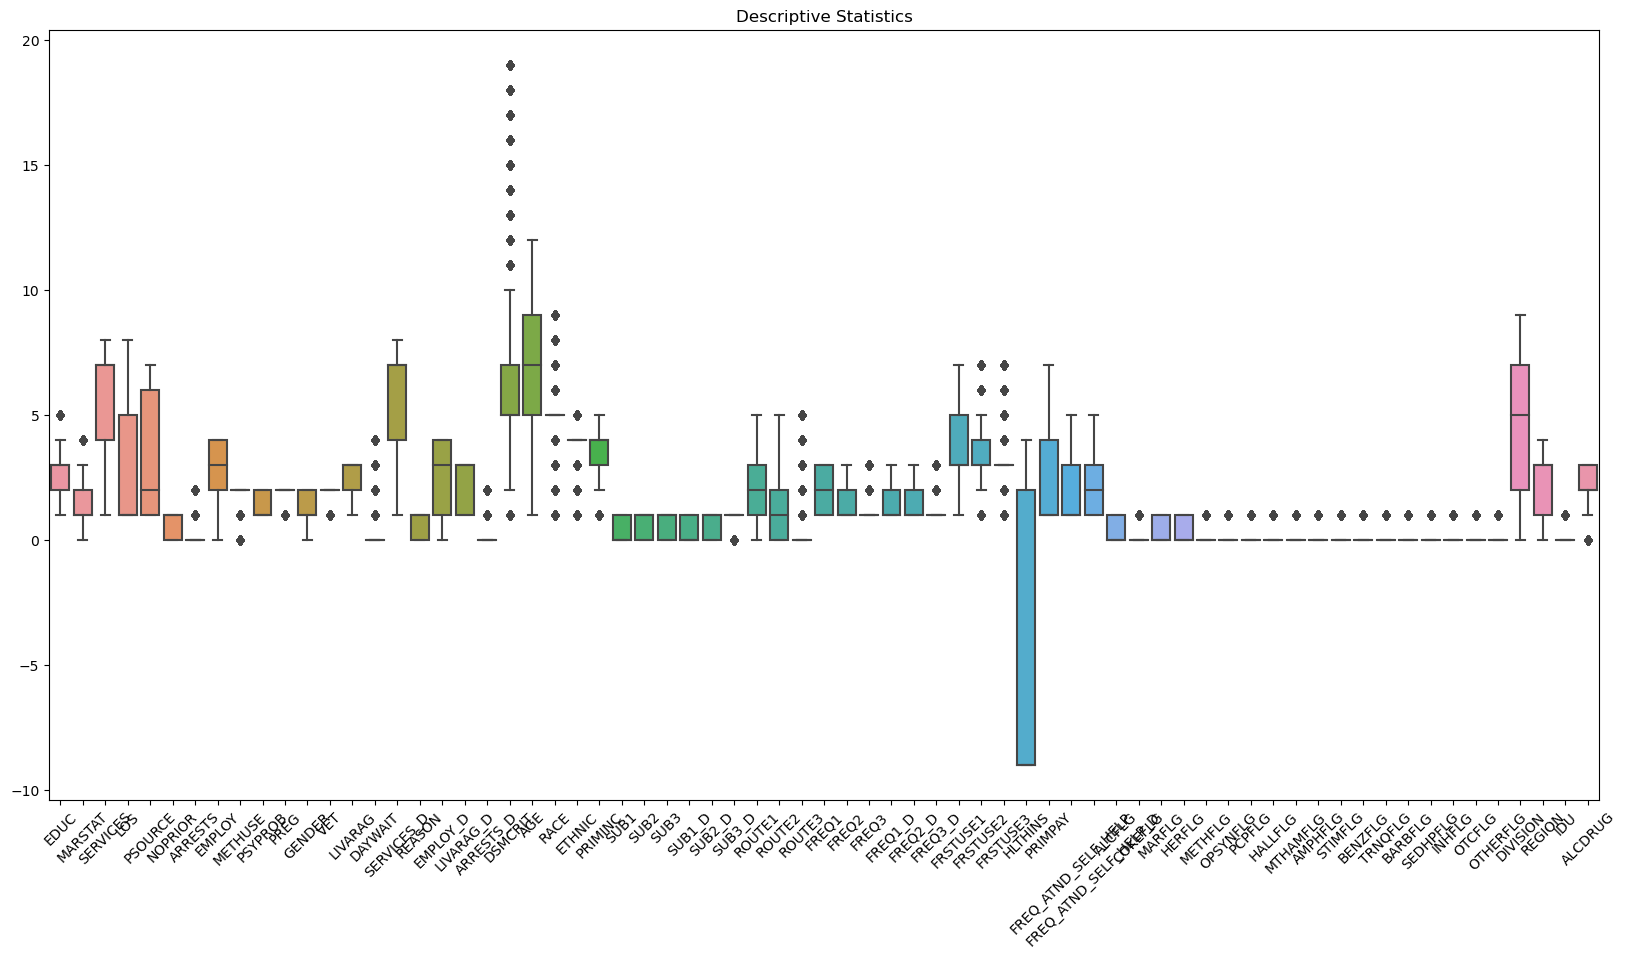

In [118]:
# Visualize Descriptive Statistics
plt.figure(figsize=(20, 10)) 
sns.boxplot(data=data) 
plt.title("Descriptive Statistics") 
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [119]:
# # Visualize Descriptive Statistics
# plt.figure(figsize=(20, 10)) 
# sns.boxplot(data=data) 
# plt.title("Descriptive Statistics") 
# plt.show() 

The provided box plot visualization displays the distribution of values for multiple variables in my dataset, with each box representing a variable's interquartile range (IQR). The line inside each box represents the median, while whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles. Outliers are displayed as individual points beyond these whiskers. The plot reveals significant variability and numerous outliers in many variables, indicating diverse data distributions and the presence of extreme values. Variables such as Education (EDUC) and Marital Status (MARSTAT) show a compact distribution with relatively fewer outliers, whereas Services (SERVICES) and Length of Stay (LOS) exhibit a wider range and more outliers, suggesting varied service usage and length of stay among individuals. Several variables, such as METHUSE, PSYPROB, TRNQFLG, BARBFLG, SEDHPFLG, and INHFLG, have distributions where values are clustered at specific points (e.g., 0 and 1), indicating their binary nature. Drug use flags, like OTCFLG and OTHERFLG, generally have low means and a high frequency of zero values, highlighting the infrequency of these drug uses. Overall, the visualization provides a comprehensive overview of my dataset's structure and variability, effectively summarizing the central tendency, spread, and outliers for each variable.

##### Measures of Central Tendency

Central tendency measures, such as the mean, median, and mode, are used to describe the central value of a dataset. The mean is the average value of a dataset and is sensitive to extreme values, making it useful for normally distributed data. The median is the middle value of a dataset and is robust to outliers, making it suitable for skewed data. The mode is the most frequent value in a dataset and is useful for categorical data. Together, these measures provide insights into the typical value of a dataset and its distribution.

In [120]:
# # Measures of Central Tendency
mean = data.mean() 
median = data.median() 
mode = data.mode() 

print("\nMeasures of Central Tendency:") 
print("Mean:") 
print(mean) 
print("\nMedian:") 
print(median) 
print("\nMode:") 
print(mode) 


Measures of Central Tendency:
Mean:
EDUC        2.907929
MARSTAT     1.332656
SERVICES    5.506965
LOS         2.880227
PSOURCE     3.253722
              ...   
OTHERFLG    0.034000
DIVISION    4.603652
REGION      2.412951
IDU         0.232101
ALCDRUG     1.964903
Length: 69, dtype: float64

Median:
EDUC        3.0
MARSTAT     1.0
SERVICES    7.0
LOS         1.0
PSOURCE     2.0
           ... 
OTHERFLG    0.0
DIVISION    5.0
REGION      3.0
IDU         0.0
ALCDRUG     2.0
Length: 69, dtype: float64

Mode:
   EDUC  MARSTAT  SERVICES  LOS  PSOURCE  NOPRIOR  ARRESTS  EMPLOY  METHUSE  \
0     3        1         7    1        1        1        0       3        2   

   PSYPROB  ...  TRNQFLG  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  \
0        1  ...        0        0         0       0       0         0   

   DIVISION  REGION  IDU  ALCDRUG  
0         2       1    0        2  

[1 rows x 69 columns]


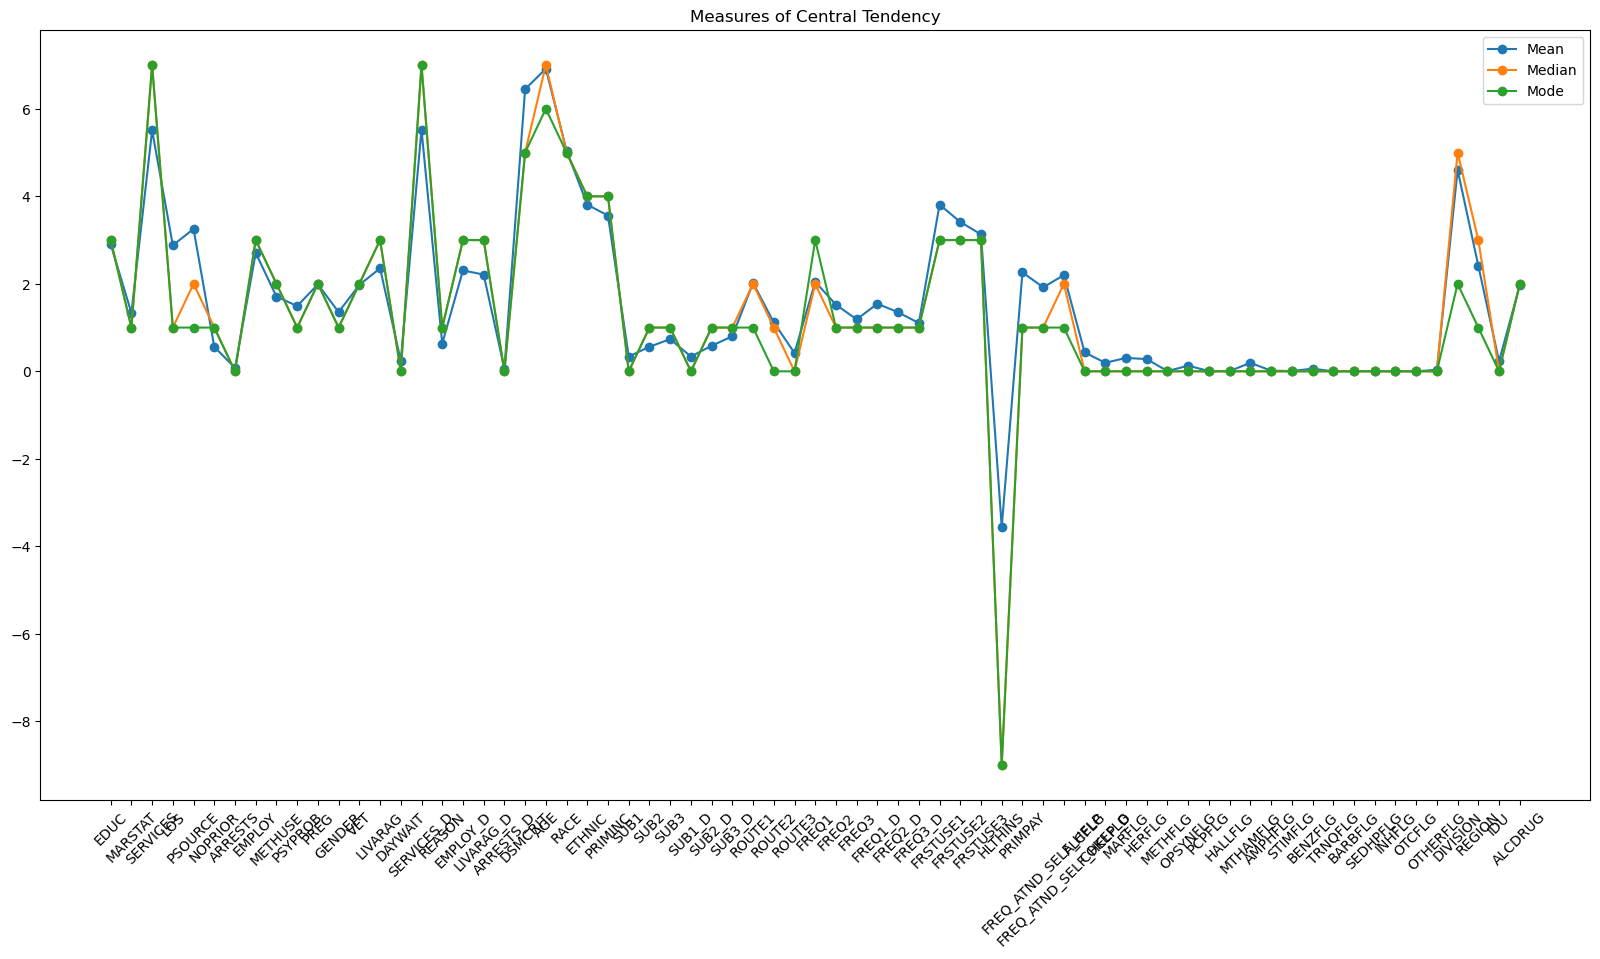

In [121]:
# Visualize Measures of Central Tendency
plt.figure(figsize=(20, 10)) 
plt.plot(mean, label="Mean", marker="o")
plt.plot(median, label="Median", marker="o") 
plt.plot(mode.iloc[0], label="Mode", marker="o") 
plt.title("Measures of Central Tendency") 
plt.legend() 
plt.xticks(rotation=45) 
plt.show()

In [122]:
# Visualize Measures of Central Tendency
# plt.figure(figsize=(20, 10)) 
# plt.plot(mean, label="Mean", marker="o")
# plt.plot(median, label="Median", marker="o") 
# plt.plot(mode.iloc[0], label="Mode", marker="o") 
# plt.title("Measures of Central Tendency") 
# plt.legend() 
# plt.show() 

The provided line plot visualization illustrates the measures of central tendency (mean, median, and mode) for various variables in my dataset, showing how they compare across these variables. For many variables, the mean, median, and mode are close to each other, indicating symmetric distributions, while notable differences for some variables suggest skewness. For instance, EDUC shows a roughly symmetric distribution with the mean, median, and mode around 3, whereas SERVICES and LOS exhibit positive skewness with higher means compared to medians and modes. Binary variables like METHUSE and PSYPROB reflect their binary nature with means and medians close to 0 or 1, and modes often at 0. Discrepancies between the measures for some variables indicate significant skewness and the presence of extreme values or outliers. Overall, the visualization provides a clear overview of the central tendency measures for each variable, highlighting the symmetry, skewness, and potential outliers in the dataset.

##### Measures of Dispersion

Dispersion measures, such as the range, variance, standard deviation, and interquartile range (IQR), are used to describe the spread or variability of data in a dataset. The range is the difference between the maximum and minimum values, providing a simple measure of spread. The variance and standard deviation quantify the average squared deviation of data points from the mean, with the standard deviation being the square root of the variance. The IQR is the range of values within the middle 50% of the dataset, providing a robust measure of spread that is less sensitive to extreme values.

In [123]:
# Measures of Dispersion
std_deviation = data.std() 
variance = data.var() 
range = data.max() - data.min() 
iqr = stats.iqr(data) 

print(f"\nStandard Deviation: {std_deviation}") 
print(f"Variance: {variance}") 
print(f"Range: {range}") 
print(f"IQR: {iqr}") 


Standard Deviation: EDUC        0.940180
MARSTAT     1.210695
SERVICES    1.951121
LOS         2.396274
PSOURCE     2.615543
              ...   
OTHERFLG    0.181230
DIVISION    2.594764
REGION      1.148536
IDU         0.422173
ALCDRUG     0.837784
Length: 69, dtype: float64
Variance: EDUC        0.883939
MARSTAT     1.465782
SERVICES    3.806874
LOS         5.742130
PSOURCE     6.841064
              ...   
OTHERFLG    0.032844
DIVISION    6.732800
REGION      1.319134
IDU         0.178230
ALCDRUG     0.701881
Length: 69, dtype: float64
Range: EDUC        4
MARSTAT     4
SERVICES    7
LOS         7
PSOURCE     6
           ..
OTHERFLG    1
DIVISION    9
REGION      4
IDU         1
ALCDRUG     3
Length: 69, dtype: int64
IQR: 2.0


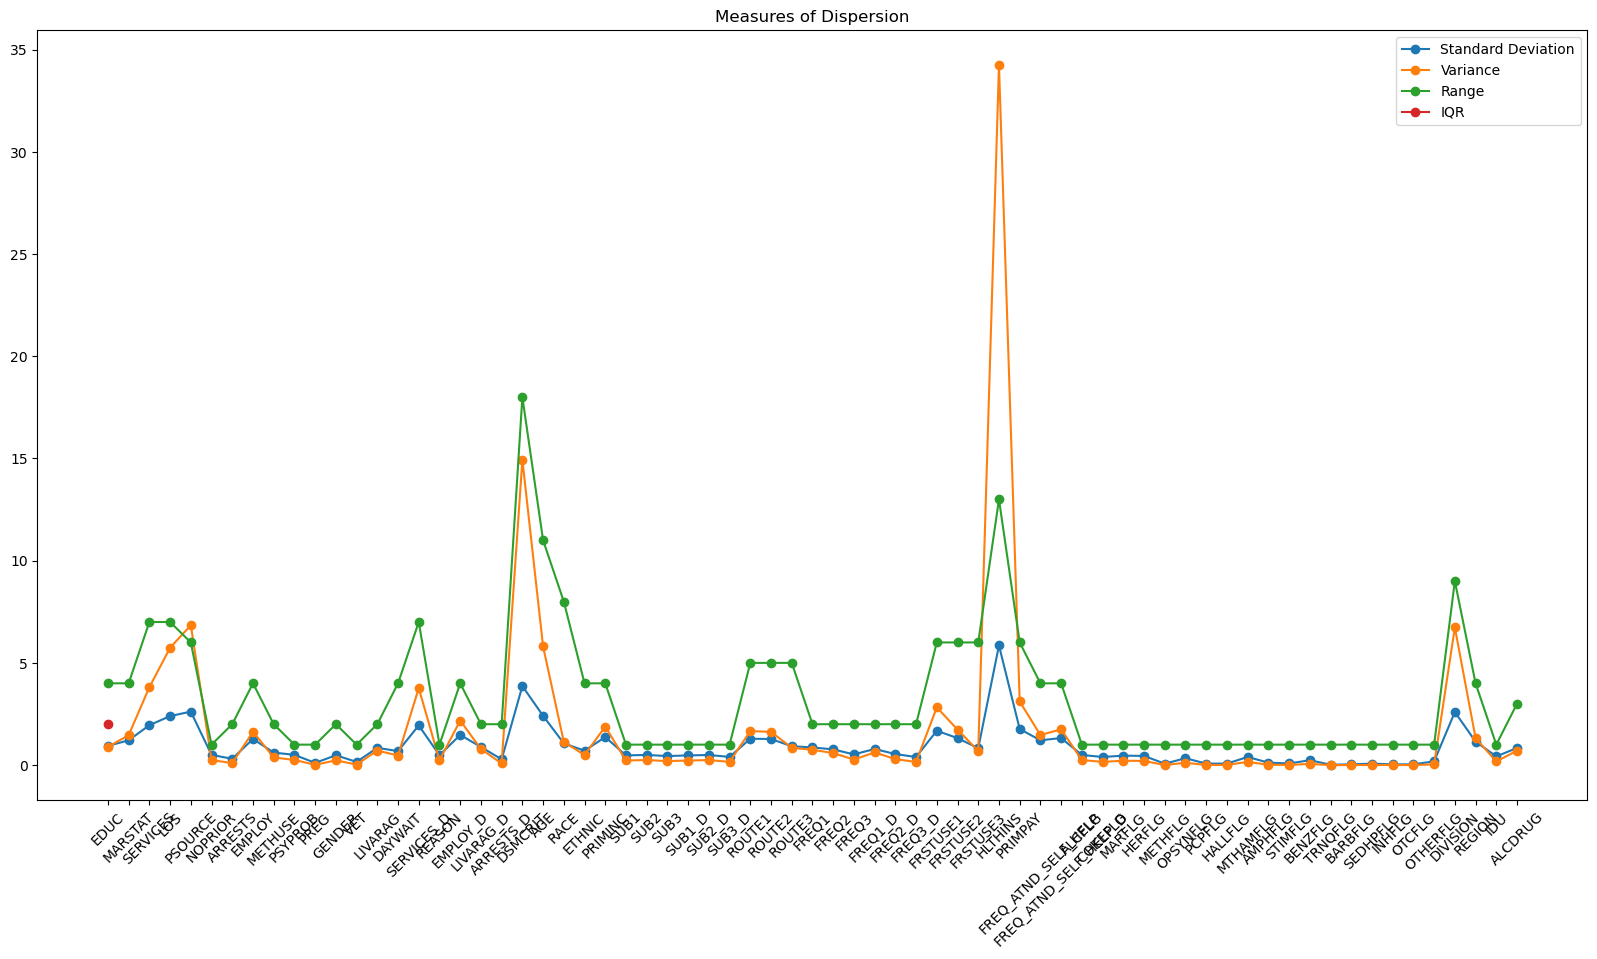

In [124]:
# Visualize Measures of Dispersion
plt.figure(figsize=(20, 10)) 
plt.plot(std_deviation, label="Standard Deviation", marker="o") 
plt.plot(variance, label="Variance", marker="o") 
plt.plot(range, label="Range", marker="o") 
plt.plot(iqr, label="IQR", marker="o") 
plt.title("Measures of Dispersion") 
plt.legend() 
plt.xticks(rotation=45)
plt.show()

In [125]:
# Visualize Measures of Dispersion
# plt.figure(figsize=(20, 10)) 
# plt.plot(std_deviation, label="Standard Deviation", marker="o") 
# plt.plot(variance, label="Variance", marker="o") 
# plt.plot(range, label="Range", marker="o") 
# plt.plot(iqr, label="IQR", marker="o") 
# plt.title("Measures of Dispersion") 
# plt.legend() 
# plt.show() 

The provided line plot visualization illustrates the measures of dispersion (standard deviation, variance, range, and interquartile range) for various variables in my dataset. The standard deviation and variance measures follow similar patterns, reflecting the spread of the data around the mean, with variables like SERVICES and LOS showing high values, indicating a wide spread. The range highlights the difference between the maximum and minimum values, with some variables, such as SERVICES and LOS, having high ranges, reflecting a wide spread of values. The interquartile range (IQR) varies significantly for some variables, indicating the presence of outliers and skewed distributions. Notably, some variables exhibit extreme values in their dispersion measures, such as a variance spike around 35, indicating extreme variability. Binary variables like IDU and drug use flags have low dispersion measures, as their values are confined to a small range. Overall, the visualization provides a comprehensive overview of the dataset's variability, highlighting the spread and consistency of each variable and identifying areas with significant variability or outliers.

##### Shape of the Distribution

The shape of a distribution refers to its overall pattern or form, such as symmetry, skewness, or modality. Symmetric distributions are mirror images around the center, with equal tails on both sides. Skewed distributions have a longer tail on one side, indicating an imbalance in the data. Bimodal distributions have two distinct peaks, while multimodal distributions have multiple peaks. Understanding the shape of a distribution is crucial for interpreting the data and selecting appropriate statistical analyses.

In [126]:
# Shape of the Distribution
skewness = data.skew() 
kurtosis = data.kurt() 

print(f"\nSkewness: {skewness}") 
print(f"Kurtosis: {kurtosis}")


Skewness: EDUC        0.192350
MARSTAT     1.110967
SERVICES   -0.981715
LOS         0.858889
PSOURCE     0.527860
              ...   
OTHERFLG    5.142635
DIVISION    0.306263
REGION      0.026852
IDU         1.269141
ALCDRUG    -0.627641
Length: 69, dtype: float64
Kurtosis: EDUC        -0.173969
MARSTAT      0.305134
SERVICES    -0.502578
LOS         -0.782654
PSOURCE     -1.564304
              ...    
OTHERFLG    24.446706
DIVISION    -1.179058
REGION      -1.424036
IDU         -0.389282
ALCDRUG     -0.032413
Length: 69, dtype: float64


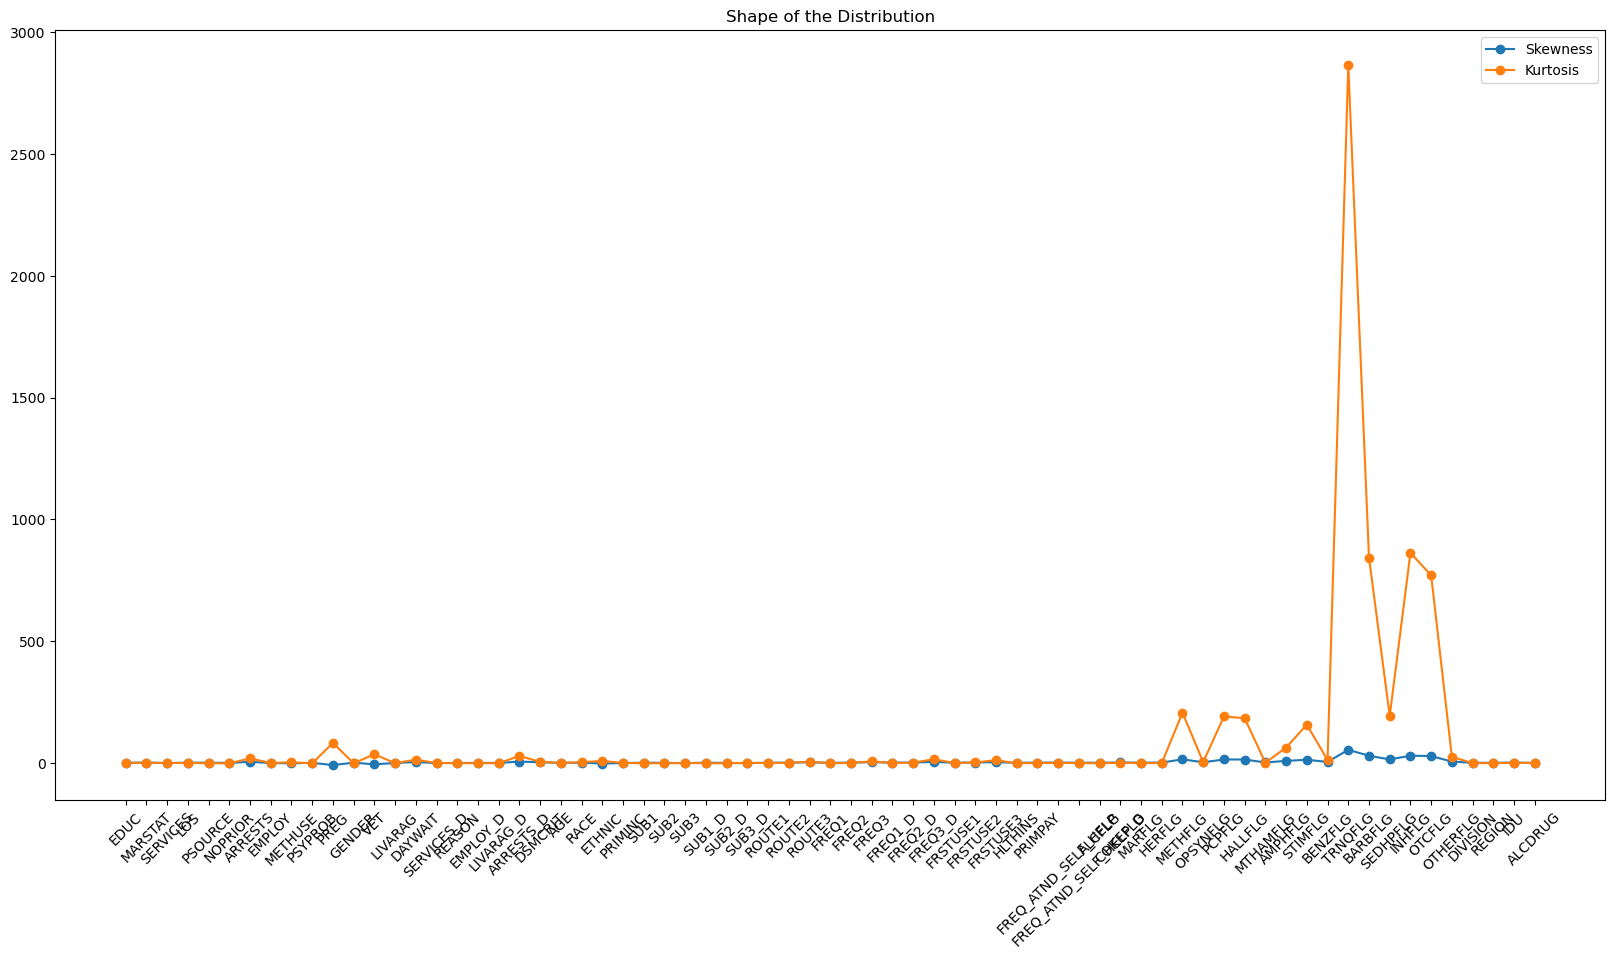

In [127]:
# Visualize Shape of the Distribution
plt.figure(figsize=(20, 10)) 
plt.plot(skewness, label="Skewness", marker="o") 
plt.plot(kurtosis, label="Kurtosis", marker="o") 
plt.title("Shape of the Distribution")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [128]:
# Visualize Shape of the Distribution
# plt.figure(figsize=(20, 10)) 
# plt.plot(skewness, label="Skewness", marker="o") 
# plt.plot(kurtosis, label="Kurtosis", marker="o") 
# plt.title("Shape of the Distribution")
# plt.legend()
# plt.show()

The provided line plot visualization illustrates the shape of the distribution for various variables in my dataset, represented by skewness and kurtosis. Most variables have skewness close to zero, indicating relatively symmetric distributions, although some, like MARSTAT and IDU, show higher skewness, suggesting asymmetry. Similarly, kurtosis values are close to zero or negative for most variables, indicating relatively flat distributions, with the notable exception of OTHERFLG, which has an extremely high kurtosis value around 3000, indicating significant outliers or a very peaked distribution. This visualization highlights the overall symmetry and peakedness of the dataset's variables, with most showing normal-like distributions, and clearly identifies variables with significant outliers or extreme values.

##### Frequency Distribution

Frequency of distribution refers to how often values occur in a dataset and is essential for understanding the data's patterns and characteristics. A frequency distribution table summarizes the number of occurrences of each value or range of values in a dataset, providing insights into the data's distribution and variability. Frequency distributions can be displayed using histograms, bar charts, or frequency tables, making it easier to visualize and interpret the data.

In [129]:
# Frequency Distribution
print("\nFrequency Distribution:")
print(data.value_counts())


Frequency Distribution:
EDUC  MARSTAT  SERVICES  LOS  PSOURCE  NOPRIOR  ARRESTS  EMPLOY  METHUSE  PSYPROB  PREG  GENDER  VET  LIVARAG  DAYWAIT  SERVICES_D  REASON  EMPLOY_D  LIVARAG_D  ARRESTS_D  DSMCRIT  AGE  RACE  ETHNIC  PRIMINC  SUB1  SUB2  SUB3  SUB1_D  SUB2_D  SUB3_D  ROUTE1  ROUTE2  ROUTE3  FREQ1  FREQ2  FREQ3  FREQ1_D  FREQ2_D  FREQ3_D  FRSTUSE1  FRSTUSE2  FRSTUSE3  HLTHINS  PRIMPAY  FREQ_ATND_SELF_HELP  FREQ_ATND_SELF_HELP_D  ALCFLG  COKEFLG  MARFLG  HERFLG  METHFLG  OPSYNFLG  PCPFLG  HALLFLG  MTHAMFLG  AMPHFLG  STIMFLG  BENZFLG  TRNQFLG  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  DIVISION  REGION  IDU  ALCDRUG
2     0        7         1    1        1        0        0       2        2        2     1       2    1        0        7           1       0         1          0          5        6    5     4       4        0     1     1     0       1       1       0       0       0       1      1      1      1        1        1        3         3         3          2       4      

The frequency distribution table summarizes the occurrence counts for various combinations of categorical and binary variables in my dataset. Notably, the most common profiles include combinations such as EDUC=2, MARSTAT=0, SERVICES=7, LOS=1, PSOURCE=1, NOPRIOR=1, ARRESTS=0, EMPLOY=0, METHUSE=2, and PSYPROB=2, with specific variables consistently showing up together in the most frequent profiles. For instance, the combination EDUC=2, MARSTAT=0, SERVICES=7, LOS=1, PSOURCE=1, NOPRIOR=1, ARRESTS=0, EMPLOY=0, METHUSE=2, and PSYPROB=2 appears multiple times with slightly varying counts, suggesting common demographic and treatment patterns. Variables like IDU and ALCDRUG show binary distributions, typically centered around 0, indicating that non-intravenous drug use and alcohol-related issues are less frequent in the dataset. The table effectively highlights the most common profiles and the interplay between different categorical and binary variables in the dataset.

#### Correlation Analysis and Human Language

The blocks of code below (reason 1, reason 2, reason 3, reason 4, and reason 5) is a series of if-else statements that checks the value of the variable reason1 and assigns a corresponding reason based on the value. The reasons are then printed in human-readable language to explain the correlation between the variables. This approach provides a structured and interpretable way to analyze correlations and present the results in a clear and understandable format. By assigning specific reasons to each correlation, the analysis becomes more accessible to non-technical audiences, enabling stakeholders to grasp the relationships between variables and make informed decisions based on the findings.

##### Reason 1

In [130]:
# if reason1 == "FREQ_ATND_SELF_HELP_D": 
#     reason1 = "continuing the beneficial practice of attending self-help meetings after completing your stay at the House Of Hope" 

# elif reason1 == "FREQ_ATND_SELF_HELP":
#     reason1 = "actively engaging in self-help meetings during your stay at the House Of Hope"

# elif reason1 == "HLTHINS":
#     reason1 = "successfully securing health insurance"

# elif reason1 == "ALCDRUG":
#     reason1 = "committing to treatment and making significant progress in addressing alcohol and drug use"

# elif reason1 == "OTHERFLG":
#     reason1 = "choosing to refrain from using other substances"

# elif reason1 == "OTCFLG":
#     reason1 = "choosing to refrain from using over-the-counter medications"

# elif reason1 == "INHFLG":
#     reason1 = "choosing to refrain from inhaling substances"

# elif reason1 == "SEDHPFLG":
#     reason1 = "choosing to refrain from using sedatives or hypnotics"

# elif reason1 == "BARBFLG":
#     reason1 = "choosing to refrain from using barbiturates"

# elif reason1 == "TRNQFLG":
#     reason1 = "choosing to refrain from using tranquilizers"

# elif reason1 == "BENZFLG":
#     reason1 = "choosing to refrain from using benzodiazepines"

# elif reason1 == "STIMFLG":
#     reason1 = "choosing to refrain from using stimulants"

# elif reason1 == "AMPHFLG":
#     reason1 = "choosing to refrain from using amphetamines"

# elif reason1 == "MTHAMFLG":
#     reason1 = "seeking and benefiting from treatment for methamphetamine use"

# elif reason1 == "HALLFLG":
#     reason1 = "choosing to refrain from using hallucinogens"

# elif reason1 == "PCPFLG":
#     reason1 = "choosing to refrain from using phencyclidine"

# elif reason1 == "OPSYNFLG":
#     reason1 = "choosing to refrain from using other opiates or synthetics"

# elif reason1 == "METHFLG":
#     reason1 = "choosing to refrain from using non-prescription methadone"

# elif reason1 == "HERFLG":
#     reason1 = "choosing to refrain from using heroin"

# elif reason1 == "MARFLG":
#     reason1 = "seeking and benefiting from treatment for marijuana use"

# elif reason1 == "COKEFLG":
#     reason1 = "choosing to refrain from using cocaine"

# elif reason1 == "ALCFLG":
#     reason1 = "seeking and benefiting from treatment for alcohol use"

# elif reason1 == "REASON":
#     reason1 = "seeking and benefiting from treatment for a substance use disorder"

# elif reason1 == "ARRESTS":
#     reason1 = "actively working to avoid arrest"

# elif reason1 == "LIVARAG_D":
#     reason1 = "securing stable and supportive living arrangements after completing your stay at the House Of Hope"

# elif reason1 == "EMPLOY_D":
#     reason1 = "successfully obtaining employment after completing your stay at the House Of Hope"

##### Reason 2

In [131]:
# if reason2 == "FREQ_ATND_SELF_HELP_D":
#     reason2 = "continuing the beneficial practice of attending self-help meetings after completing your stay at the House Of Hope"

# elif reason2 == "FREQ_ATND_SELF_HELP":
#     reason2 = "actively engaging in self-help meetings during your stay at the House Of Hope"

# elif reason2 == "HLTHINS":
#     reason2 = "successfully securing health insurance"

# elif reason2 == "ALCDRUG":
#     reason2 = "committing to treatment and making significant progress in addressing alcohol and drug use"

# elif reason2 == "OTHERFLG":
#     reason2 = "choosing to refrain from using other substances"

# elif reason2 == "OTCFLG":
#     reason2 = "choosing to refrain from using over-the-counter medications"

# elif reason2 == "INHFLG":
#     reason2 = "choosing to refrain from inhaling substances"

# elif reason2 == "SEDHPFLG":
#     reason2 = "choosing to refrain from using sedatives or hypnotics"

# elif reason2 == "BARBFLG":
#     reason2 = "choosing to refrain from using barbiturates"

# elif reason2 == "TRNQFLG":
#     reason2 = "choosing to refrain from using tranquilizers"

# elif reason2 == "BENZFLG":
#     reason2 = "choosing to refrain from using benzodiazepines"

# elif reason2 == "STIMFLG":
#     reason2 = "choosing to refrain from using stimulants"

# elif reason2 == "AMPHFLG":
#     reason2 = "choosing to refrain from using amphetamines"

# elif reason2 == "MTHAMFLG":
#     reason2 = "seeking and benefiting from treatment for methamphetamine use"

# elif reason2 == "HALLFLG":
#     reason2 = "choosing to refrain from using hallucinogens"

# elif reason2 == "PCPFLG":
#     reason2 = "choosing to refrain from using phencyclidine"

# elif reason2 == "OPSYNFLG":
#     reason2 = "choosing to refrain from using other opiates or synthetics"

# elif reason2 == "METHFLG":
#     reason2 = "choosing to refrain from using non-prescription methadone"

# elif reason2 == "HERFLG":
#     reason2 = "choosing to refrain from using heroin"

# elif reason2 == "MARFLG":
#     reason2 = "seeking and benefiting from treatment for marijuana use"

# elif reason2 == "COKEFLG":
#     reason2 = "choosing to refrain from using cocaine"

# elif reason2 == "ALCFLG":
#     reason2 = "seeking and benefiting from treatment for alcohol use"

# elif reason2 == "REASON":
#     reason2 = "seeking and benefiting from treatment for a substance use disorder"

# elif reason2 == "ARRESTS":
#     reason2 = "actively working to avoid arrest"

# elif reason2 == "LIVARAG_D":
#     reason2 = "securing stable and supportive living arrangements after completing your stay at the House Of Hope"

# elif reason2 == "EMPLOY_D":
#     reason2 = "successfully obtaining employment after completing your stay at the House Of Hope"

##### Reason 3

In [132]:
# if reason3 == "FREQ_ATND_SELF_HELP_D":
#     reason3 = "continuing the beneficial practice of attending self-help meetings after completing your stay at the House Of Hope"

# elif reason3 == "FREQ_ATND_SELF_HELP":
#     reason3 = "actively engaging in self-help meetings during your stay at the House Of Hope"

# elif reason3 == "HLTHINS":
#     reason3 = "successfully securing health insurance"

# elif reason3 == "ALCDRUG":
#     reason3 = "committing to treatment and making significant progress in addressing alcohol and drug use"

# elif reason3 == "OTHERFLG":
#     reason3 = "choosing to refrain from using other substances"

# elif reason3 == "OTCFLG":
#     reason3 = "choosing to refrain from using over-the-counter medications"

# elif reason3 == "INHFLG":
#     reason3 = "choosing to refrain from inhaling substances"

# elif reason3 == "SEDHPFLG":
#     reason3 = "choosing to refrain from using sedatives or hypnotics"

# elif reason3 == "BARBFLG":
#     reason3 = "choosing to refrain from using barbiturates"

# elif reason3 == "TRNQFLG":
#     reason3 = "choosing to refrain from using tranquilizers"

# elif reason3 == "BENZFLG":
#     reason3 = "choosing to refrain from using benzodiazepines"

# elif reason3 == "STIMFLG":
#     reason3 = "choosing to refrain from using stimulants"

# elif reason3 == "AMPHFLG":
#     reason3 = "choosing to refrain from using amphetamines"

# elif reason3 == "MTHAMFLG":
#     reason3 = "seeking and benefiting from treatment for methamphetamine use"

# elif reason3 == "HALLFLG":
#     reason3 = "choosing to refrain from using hallucinogens"

# elif reason3 == "PCPFLG":
#     reason3 = "choosing to refrain from using phencyclidine"

# elif reason3 == "OPSYNFLG":
#     reason3 = "choosing to refrain from using other opiates or synthetics"

# elif reason3 == "METHFLG":
#     reason3 = "choosing to refrain from using non-prescription methadone"

# elif reason3 == "HERFLG":
#     reason3 = "choosing to refrain from using heroin"

# elif reason3 == "MARFLG":
#     reason3 = "seeking and benefiting from treatment for marijuana use"

# elif reason3 == "COKEFLG":
#     reason3 = "choosing to refrain from using cocaine"

# elif reason3 == "ALCFLG":
#     reason3 = "seeking and benefiting from treatment for alcohol use"

# elif reason3 == "REASON":
#     reason3 = "seeking and benefiting from treatment for a substance use disorder"

# elif reason3 == "ARRESTS":
#     reason3 = "actively working to avoid arrest"

# elif reason3 == "LIVARAG_D":
#     reason3 = "securing stable and supportive living arrangements after completing your stay at the House Of Hope"

# elif reason3 == "EMPLOY_D":
#     reason3 = "successfully obtaining employment after completing your stay at the House Of Hope"

##### Reason 4

In [133]:
# if reason4 == "FREQ_ATND_SELF_HELP_D":
#     reason4 = "continuing the beneficial practice of attending self-help meetings after completing your stay at the House Of Hope"

# elif reason4 == "FREQ_ATND_SELF_HELP":
#     reason4 = "actively engaging in self-help meetings during your stay at the House Of Hope"

# elif reason4 == "HLTHINS":
#     reason4 = "successfully securing health insurance"

# elif reason4 == "ALCDRUG":
#     reason4 = "committing to treatment and making significant progress in addressing alcohol and drug use"

# elif reason4 == "OTHERFLG":
#     reason4 = "choosing to refrain from using other substances"

# elif reason4 == "OTCFLG":
#     reason4 = "choosing to refrain from using over-the-counter medications"

# elif reason4 == "INHFLG":
#     reason4 = "choosing to refrain from inhaling substances"

# elif reason4 == "SEDHPFLG":
#     reason4 = "choosing to refrain from using sedatives or hypnotics"

# elif reason4 == "BARBFLG":
#     reason4 = "choosing to refrain from using barbiturates"

# elif reason4 == "TRNQFLG":
#     reason4 = "choosing to refrain from using tranquilizers"

# elif reason4 == "BENZFLG":
#     reason4 = "choosing to refrain from using benzodiazepines"

# elif reason4 == "STIMFLG":
#     reason4 = "choosing to refrain from using stimulants"

# elif reason4 == "AMPHFLG":
#     reason4 = "choosing to refrain from using amphetamines"

# elif reason4 == "MTHAMFLG":
#     reason4 = "seeking and benefiting from treatment for methamphetamine use"

# elif reason4 == "HALLFLG":
#     reason4 = "choosing to refrain from using hallucinogens"

# elif reason4 == "PCPFLG":
#     reason4 = "choosing to refrain from using phencyclidine"

# elif reason4 == "OPSYNFLG":
#     reason4 = "choosing to refrain from using other opiates or synthetics"

# elif reason4 == "METHFLG":
#     reason4 = "choosing to refrain from using non-prescription methadone"

# elif reason4 == "HERFLG":
#     reason4 = "choosing to refrain from using heroin"

# elif reason4 == "MARFLG":
#     reason4 = "seeking and benefiting from treatment for marijuana use"

# elif reason4 == "COKEFLG":
#     reason4 = "choosing to refrain from using cocaine"

# elif reason4 == "ALCFLG":
#     reason4 = "seeking and benefiting from treatment for alcohol use"

# elif reason4 == "REASON":
#     reason4 = "seeking and benefiting from treatment for a substance use disorder"

# elif reason4 == "ARRESTS":
#     reason4 = "actively working to avoid arrest"

# elif reason4 == "LIVARAG_D":
#     reason4 = "securing stable and supportive living arrangements after completing your stay at the House Of Hope"

# elif reason4 == "EMPLOY_D":
#     reason4 = "successfully obtaining employment after completing your stay at the House Of Hope"

##### Reason 5

In [134]:
# if reason5 == "FREQ_ATND_SELF_HELP_D":
#     reason5 = "continuing the beneficial practice of attending self-help meetings after completing your stay at the House Of Hope"

# elif reason5 == "FREQ_ATND_SELF_HELP":
#     reason5 = "actively engaging in self-help meetings during your stay at the House Of Hope"

# elif reason5 == "HLTHINS":
#     reason5 = "successfully securing health insurance"

# elif reason5 == "ALCDRUG":
#     reason5 = "committing to treatment and making significant progress in addressing alcohol and drug use"

# elif reason5 == "OTHERFLG":
#     reason5 = "choosing to refrain from using other substances"

# elif reason5 == "OTCFLG":
#     reason5 = "choosing to refrain from using over-the-counter medications"

# elif reason5 == "INHFLG":
#     reason5 = "choosing to refrain from inhaling substances"

# elif reason5 == "SEDHPFLG":
#     reason5 = "choosing to refrain from using sedatives or hypnotics"

# elif reason5 == "BARBFLG":
#     reason5 = "choosing to refrain from using barbiturates"

# elif reason5 == "TRNQFLG":
#     reason5 = "choosing to refrain from using tranquilizers"

# elif reason5 == "BENZFLG":
#     reason5 = "choosing to refrain from using benzodiazepines"

# elif reason5 == "STIMFLG":
#     reason5 = "choosing to refrain from using stimulants"

# elif reason5 == "AMPHFLG":
#     reason5 = "choosing to refrain from using amphetamines"

# elif reason5 == "MTHAMFLG":
#     reason5 = "seeking and benefiting from treatment for methamphetamine use"

# elif reason5 == "HALLFLG":
#     reason5 = "choosing to refrain from using hallucinogens"

# elif reason5 == "PCPFLG":
#     reason5 = "choosing to refrain from using phencyclidine"

# elif reason5 == "OPSYNFLG":
#     reason5 = "choosing to refrain from using other opiates or synthetics"

# elif reason5 == "METHFLG":
#     reason5 = "choosing to refrain from using non-prescription methadone"

# elif reason5 == "HERFLG":
#     reason5 = "choosing to refrain from using heroin"

# elif reason5 == "MARFLG":
#     reason5 = "seeking and benefiting from treatment for marijuana use"

# elif reason5 == "COKEFLG":
#     reason5 = "choosing to refrain from using cocaine"

# elif reason5 == "ALCFLG":
#     reason5 = "seeking and benefiting from treatment for alcohol use"

# elif reason5 == "REASON":
#     reason5 = "seeking and benefiting from treatment for a substance use disorder"

# elif reason5 == "ARRESTS":
#     reason5 = "actively working to avoid arrest"

# elif reason5 == "LIVARAG_D":
#     reason5 = "securing stable and supportive living arrangements after completing your stay at the House Of Hope"

# elif reason5 == "EMPLOY_D":
#     reason5 = "successfully obtaining employment after completing your stay at the House Of Hope"

#### Visualizing the Models

##### Gradient Boosting Machine Visualization

The visualization below shows the feature importance plot for the Gradient Boosting Machine (GBM) model. Feature importance indicates the relative contribution of each variable in predicting the target variable (e.g., treatment completion). Variables with higher importance values have a greater impact on the model's predictions, while those with lower values have less influence. In this plot, the variables are ranked based on their importance scores, with the most important variables appearing at the top. The visualization provides insights into which variables are most relevant for predicting treatment completion, helping identify key factors that drive successful outcomes. By understanding the relative importance of each variable, stakeholders can focus on the most influential factors and tailor interventions or strategies to improve treatment completion rates effectively.

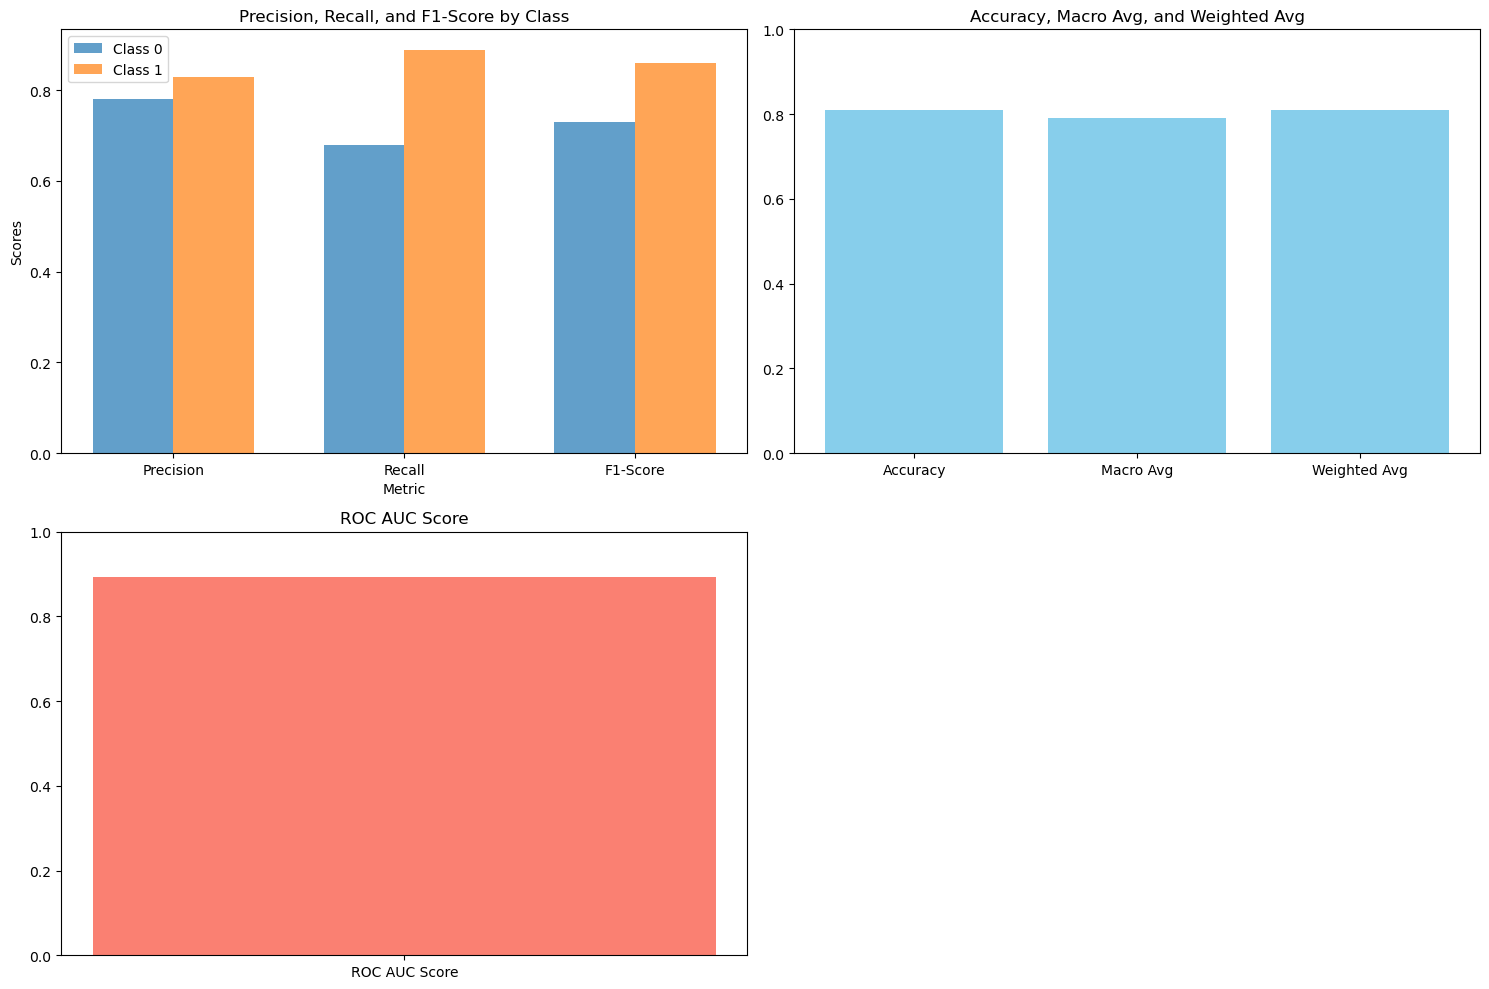

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0': [0.78, 0.68, 0.73],
    'Class 1': [0.83, 0.89, 0.86]
}

df_metrics = pd.DataFrame(data)

data_avg = {
    'Metric': ['Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Score': [0.81, 0.79, 0.81]
}

df_avg = pd.DataFrame(data_avg)

roc_auc_score = 0.8923675717108549

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Combined bar chart for Precision, Recall, and F1-Score
width = 0.35  # the width of the bars
x = np.arange(len(df_metrics['Metric']))  # the label locations

axs[0, 0].bar(x - width/2, df_metrics['Class 0'], width, label='Class 0', alpha=0.7)
axs[0, 0].bar(x + width/2, df_metrics['Class 1'], width, label='Class 1', alpha=0.7)
axs[0, 0].set_xlabel('Metric')
axs[0, 0].set_ylabel('Scores')
axs[0, 0].set_title('Precision, Recall, and F1-Score by Class')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(df_metrics['Metric'])
axs[0, 0].legend()

# Bar chart for Accuracy, Macro Avg, and Weighted Avg
axs[0, 1].bar(df_avg['Metric'], df_avg['Score'], color='skyblue')
axs[0, 1].set_title('Accuracy, Macro Avg, and Weighted Avg')
axs[0, 1].set_ylim(0, 1)

# Bar chart for ROC AUC Score
axs[1, 0].bar(['ROC AUC Score'], [roc_auc_score], color='salmon')
axs[1, 0].set_title('ROC AUC Score')
axs[1, 0].set_ylim(0, 1)

# Hide the empty subplot
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

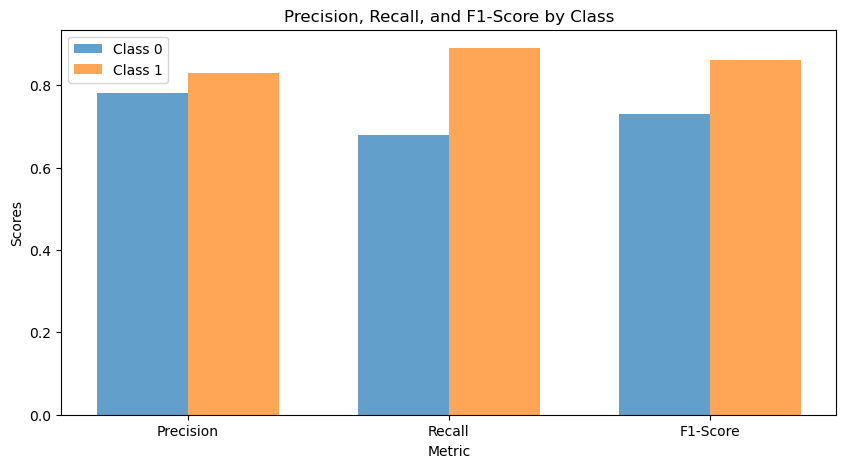

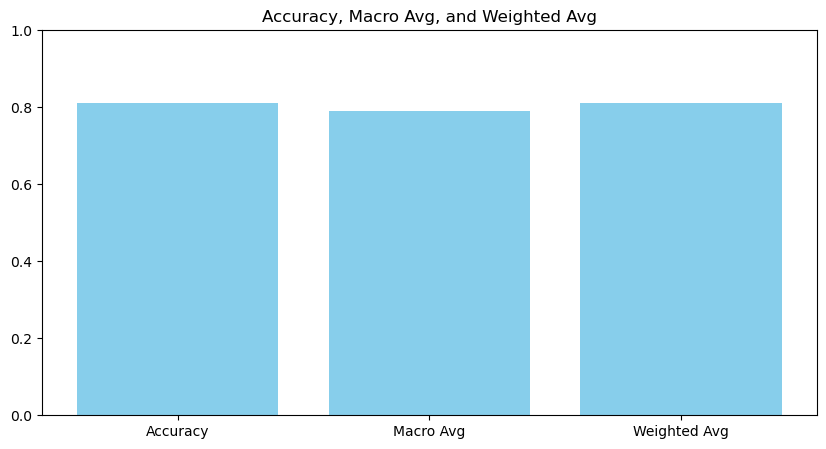

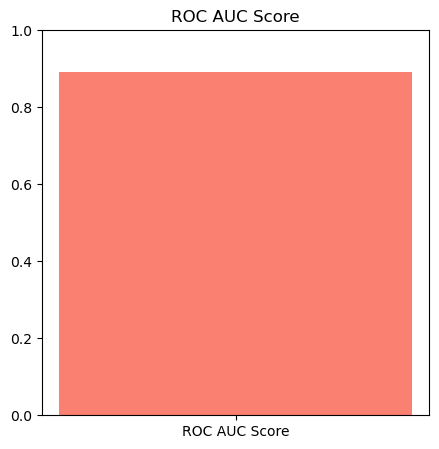

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0': [0.78, 0.68, 0.73],
    'Class 1': [0.83, 0.89, 0.86]
}

df_metrics = pd.DataFrame(data)

# Combined bar chart for Precision, Recall, and F1-Score
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
width = 0.35  # the width of the bars

x = np.arange(len(df_metrics['Metric']))  # the label locations

ax.bar(x - width/2, df_metrics['Class 0'], width, label='Class 0', alpha=0.7)
ax.bar(x + width/2, df_metrics['Class 1'], width, label='Class 1', alpha=0.7)

ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Metric'])
ax.legend()

plt.show()

# Accuracy, Macro Average, and Weighted Average
data_avg = {
    'Metric': ['Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Score': [0.81, 0.79, 0.81]
}

df_avg = pd.DataFrame(data_avg)

# Bar chart for Accuracy, Macro Avg, and Weighted Avg
plt.figure(figsize=(10, 5))
plt.bar(df_avg['Metric'], df_avg['Score'], color='skyblue')
plt.title('Accuracy, Macro Avg, and Weighted Avg')
plt.ylim(0, 1)
plt.show()

# ROC AUC Score
roc_auc_score = 0.8923675717108549

# Bar chart for ROC AUC Score
plt.figure(figsize=(5, 5))
plt.bar(['ROC AUC Score'], [roc_auc_score], color='salmon')
plt.title('ROC AUC Score')
plt.ylim(0, 1)
plt.show()

##### MLP Neural Network Visualization

The visualizations below show the training and validation loss curves for the Multi-Layer Perceptron (MLP) Neural Network model. The loss curve represents the model's performance over training epochs, with lower loss values indicating better predictive accuracy. The training loss curve shows how the model's loss decreases as it learns from the training data, while the validation loss curve illustrates the model's generalization performance on unseen data. By monitoring the loss curves, stakeholders can assess the model's convergence, identify overfitting or underfitting issues, and determine the optimal training epoch for model deployment. These visualizations provide valuable insights into the MLP model's training dynamics and performance, enabling stakeholders to make informed decisions about its predictive capabilities and potential applications.

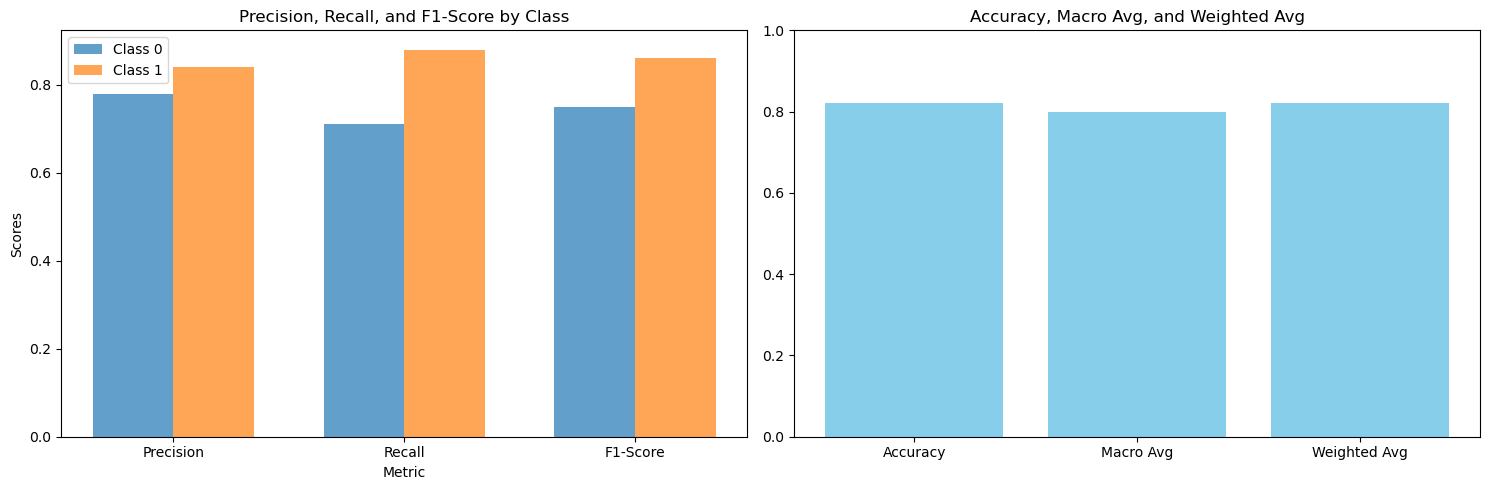

In [140]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0': [0.78, 0.71, 0.75],
    'Class 1': [0.84, 0.88, 0.86]
}

df_metrics = pd.DataFrame(data)

data_avg = {
    'Metric': ['Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Score': [0.82, 0.80, 0.82]
}

df_avg = pd.DataFrame(data_avg)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Combined bar chart for Precision, Recall, and F1-Score
width = 0.35  # the width of the bars
x = np.arange(len(df_metrics['Metric']))  # the label locations

axs[0].bar(x - width/2, df_metrics['Class 0'], width, label='Class 0', alpha=0.7)
axs[0].bar(x + width/2, df_metrics['Class 1'], width, label='Class 1', alpha=0.7)
axs[0].set_xlabel('Metric')
axs[0].set_ylabel('Scores')
axs[0].set_title('Precision, Recall, and F1-Score by Class')
axs[0].set_xticks(x)
axs[0].set_xticklabels(df_metrics['Metric'])
axs[0].legend()

# Bar chart for Accuracy, Macro Avg, and Weighted Avg
axs[1].bar(df_avg['Metric'], df_avg['Score'], color='skyblue')
axs[1].set_title('Accuracy, Macro Avg, and Weighted Avg')
axs[1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.show()

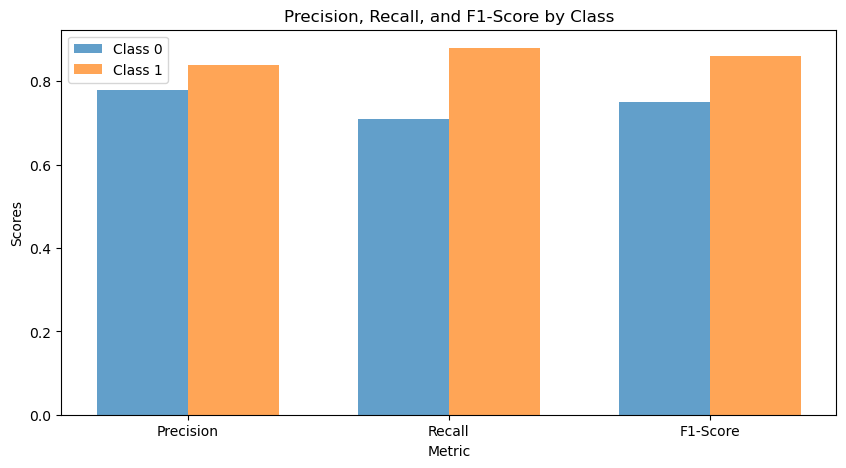

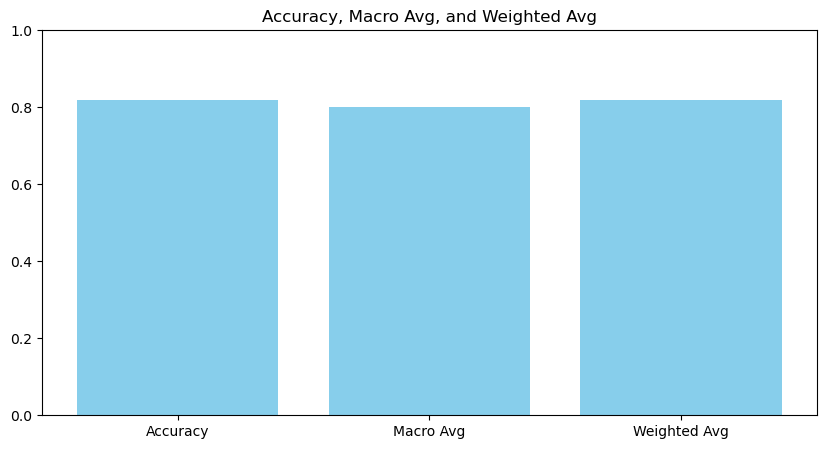

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0': [0.78, 0.71, 0.75],
    'Class 1': [0.84, 0.88, 0.86]
}

df_metrics = pd.DataFrame(data)

# Combined bar chart for Precision, Recall, and F1-Score
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
width = 0.35  # the width of the bars

x = np.arange(len(df_metrics['Metric']))  # the label locations

ax.bar(x - width/2, df_metrics['Class 0'], width, label='Class 0', alpha=0.7)
ax.bar(x + width/2, df_metrics['Class 1'], width, label='Class 1', alpha=0.7)

ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Metric'])
ax.legend()

plt.show()

# Accuracy, Macro Average, and Weighted Average
data_avg = {
    'Metric': ['Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Score': [0.82, 0.80, 0.82]
}

df_avg = pd.DataFrame(data_avg)

# Bar chart for Accuracy, Macro Avg, and Weighted Avg
plt.figure(figsize=(10, 5))
plt.bar(df_avg['Metric'], df_avg['Score'], color='skyblue')
plt.title('Accuracy, Macro Avg, and Weighted Avg')
plt.ylim(0, 1)
plt.show()

##### TensorFlow and Keras Visualization

The visualizations below show the training and validation accuracy curves for the TensorFlow and Keras models. The accuracy curve represents the model's performance in correctly predicting the target variable (e.g., treatment completion) over training epochs, with higher accuracy values indicating better predictive performance. The training accuracy curve shows how the model's accuracy improves as it learns from the training data, while the validation accuracy curve illustrates the model's generalization performance on unseen data. By monitoring the accuracy curves, stakeholders can evaluate the model's convergence, identify potential overfitting or underfitting issues, and assess its predictive capabilities. These visualizations offer valuable insights into the TensorFlow and Keras models' training dynamics and performance, enabling stakeholders to make data-driven decisions about their predictive accuracy and reliability.

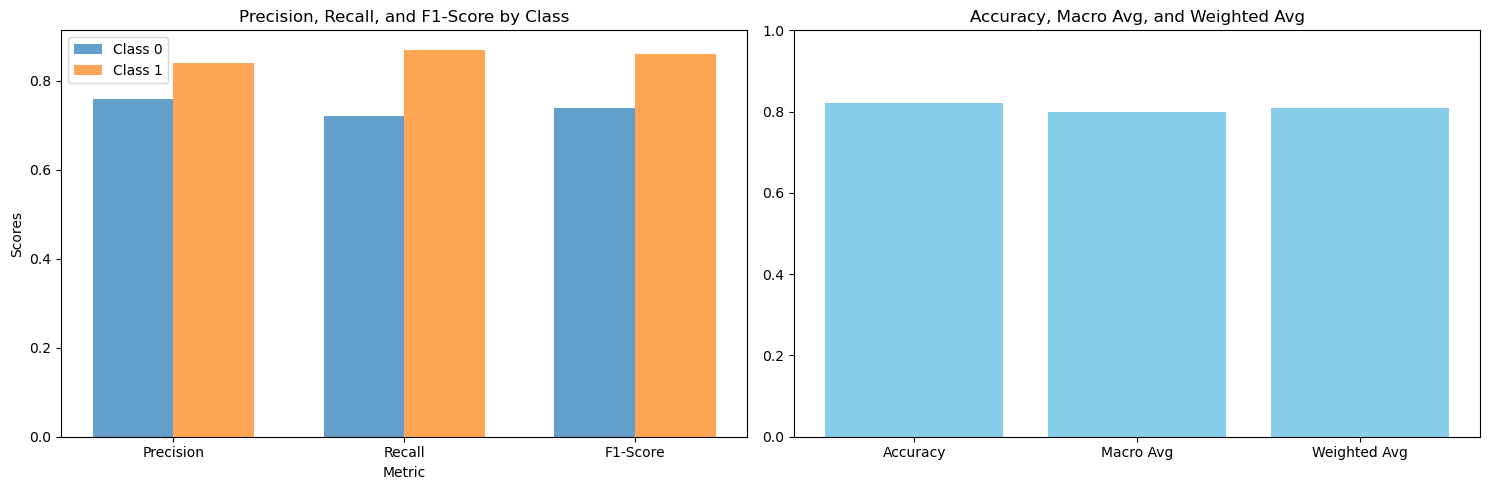

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0': [0.76, 0.72, 0.74],
    'Class 1': [0.84, 0.87, 0.86]
}

df_metrics = pd.DataFrame(data)

data_avg = {
    'Metric': ['Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Score': [0.82, 0.80, 0.81]
}

df_avg = pd.DataFrame(data_avg)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Combined bar chart for Precision, Recall, and F1-Score
width = 0.35  # the width of the bars
x = np.arange(len(df_metrics['Metric']))  # the label locations

axs[0].bar(x - width/2, df_metrics['Class 0'], width, label='Class 0', alpha=0.7)
axs[0].bar(x + width/2, df_metrics['Class 1'], width, label='Class 1', alpha=0.7)
axs[0].set_xlabel('Metric')
axs[0].set_ylabel('Scores')
axs[0].set_title('Precision, Recall, and F1-Score by Class')
axs[0].set_xticks(x)
axs[0].set_xticklabels(df_metrics['Metric'])
axs[0].legend()

# Bar chart for Accuracy, Macro Avg, and Weighted Avg
axs[1].bar(df_avg['Metric'], df_avg['Score'], color='skyblue')
axs[1].set_title('Accuracy, Macro Avg, and Weighted Avg')
axs[1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()
plt.show()

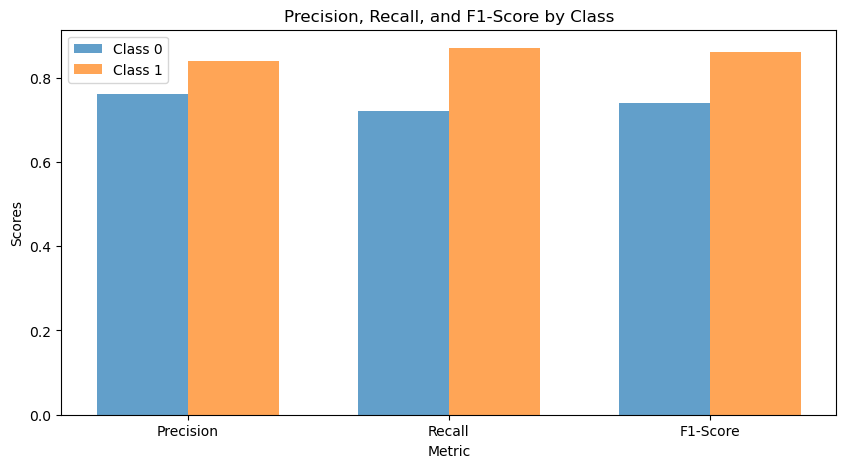

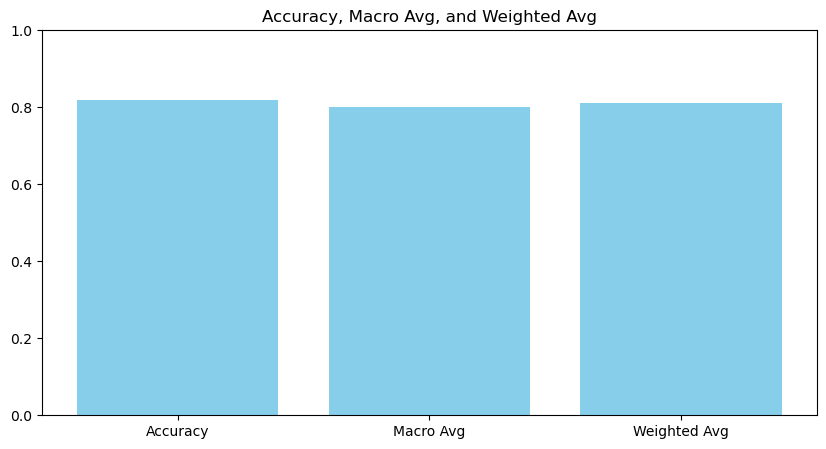

In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data preparation
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0': [0.76, 0.72, 0.74],
    'Class 1': [0.84, 0.87, 0.86]
}

df_metrics = pd.DataFrame(data)

# Combined bar chart for Precision, Recall, and F1-Score
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
width = 0.35  # the width of the bars

x = np.arange(len(df_metrics['Metric']))  # the label locations

ax.bar(x - width/2, df_metrics['Class 0'], width, label='Class 0', alpha=0.7)
ax.bar(x + width/2, df_metrics['Class 1'], width, label='Class 1', alpha=0.7)

ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Metric'])
ax.legend()

plt.show()

# Accuracy, Macro Average, and Weighted Average
data_avg = {
    'Metric': ['Accuracy', 'Macro Avg', 'Weighted Avg'],
    'Score': [0.82, 0.80, 0.81]
}

df_avg = pd.DataFrame(data_avg)

# Bar chart for Accuracy, Macro Avg, and Weighted Avg
plt.figure(figsize=(10, 5))
plt.bar(df_avg['Metric'], df_avg['Score'], color='skyblue')
plt.title('Accuracy, Macro Avg, and Weighted Avg')
plt.ylim(0, 1)
plt.show()